# Transfer Functions creation & manipulation.

Let's imagine a DC motor having the next block-diagram model :

![](./1_1_image1.png)

![](./1_1_image2.png)

Here are the parameters : 

- $R_a = 1,6 [Ohms]$
- $L_a = 32 [mH]$
- $K_{\phi} = 1,7 [Nm/A]$ or $[V/rad/s]$
- $J = 0,07 [kgm²]$
- $R_f = 0,16 [Nm/rad/s]$

You're asked to :

- Compute, using Matlab, the transfer function between the motor's speed $\omega$ and the voltage $U_a$
- Plot the speed evolution for 2.5 seconds, if the voltage $U_a$ is a ramp (with a slope of $40V/s$) during 1 second and then stays constant.
- Plot the poles of the transfer function in the complex plane

Solution : $$H(s) = \frac{758.9}{s^2 + 52.29 s + 1404}$$

![](./linear_sim_result.svg)

![](./pole_zero_map.svg)

In [2]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt

# better plots
%config InlineBackend.figure_formats = ['svg']

In [3]:
Ra = 1.6
La = 0.032
Rf = 0.16
Kphi = 1.7
J = 0.07

# Transfer Function computation
s = ct.tf('s')
assert s is not None
H1 = Kphi/(Ra+s*La)
H2 = 1/(s*J)
H3 = ct.feedback(H2, Rf)
H4 = H1*H3
H = ct.feedback(H4, Kphi)
H = ct.minreal(H)
print(H)

0 states have been removed from the model
<TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         758.9
  --------------------
  s^2 + 52.29 s + 1404


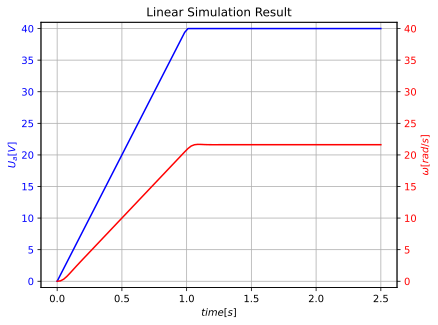

In [4]:
# time response
t = np.linspace(0, 2.5, 100)
u = 40 * t
u[t>1] = 40

_, out = ct.forced_response(H, t, u)

plt.figure()
plt.title('Linear Simulation Result')
plt.grid()
plt.xlabel("$time [s]$")
plt.ylabel("$U_a [V]$", color='b')
plt.yticks(color='b')
plt.ylim((-1, 41))
plt.plot(t, u, 'b')
plt.twinx()
plt.ylabel(r"$\omega [rad/s]$", color='r')
plt.yticks(color='r')
plt.ylim((-1, 41))
plt.plot(t, out, 'r')
plt.show()

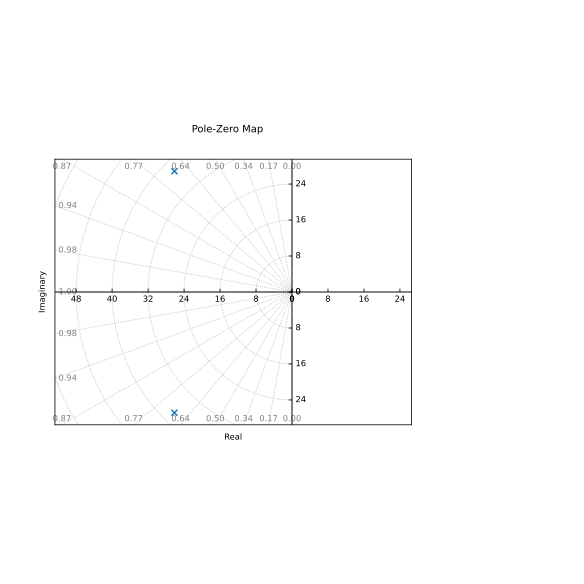

In [5]:
ct.pzmap(H, grid=True, title="Pole-Zero Map")
plt.show()